## BART Project - 2016 ve 2017 Verileri

Bart istasyonu, San Francisco Körfez Bölgesi'ndeki hızlı tren sisteminin adıdır. Tam adı "Bay Area Rapid Transit" (BART) olup, 
diğer ülkelerdeki metro veya banliyö sistemlerinden biri değil, tamamen Amerika'nın San Francisco Körfez Bölgesi'ne has bir ulaşım altyapısıdır.

Başlıca özellikleri şunlardır:
* 1972 yılında hizmete açılmıştır ve bölgeye yayılan 50 istasyondan oluşur.
* Yaklaşık 179 kilometrelik bir ağa sahiptir ve günde ortalama 432.000 yolcu taşır.
* Elektrikli trenleri kullanır ve çok yüksek frekanslı seferler gerçekleştirir.
* Bölgedeki metropol merkezleri arasında hızlı ve konforlu bir ulaşım sağlar.
* Hem yeraltı istasyonları hem de yüzey istasyonları bulunur.
* Çevreci bir ulaşım sistemidir ve trafiği azaltmaya yardımcı olur.
Özetle, BART San Francisco Körfez Bölgesi'nin ana toplu taşıma omurgasını oluşturan, yüksek kapasiteli ve hızlı bir banliyö demiryolu sistemidir.

### Veri Analiziyle ilgili Sorular
* En yoğun BART istasyonu hangisidir?
* En az popüler BART güzergahı hangisidir?
* Bir koltuk bulmak istiyorsanız Berkeley'den sf'ye gitmek için en iyi zaman ne zamandır?
* Haftanın hangi günü en yoğun?
* Gece geç saatlerde BART'a kaç kişi biniyor?

### Veri Bilimi Soruları
* Soru A: Her istasyon arasındaki düz çizgi mesafesini hesaplayın
* Soru B: Herhangi 2 istasyon arasında Bart ile işe gidip gelen kişi sayısını tahmin edebilen bir model oluşturun:
* Buna nasıl yaklaşırdınız?
* Hangi ek verilere ihtiyacınız olurdu?
* Şehir veya Bart yetkililerinin verilerinizi nasıl kullanmasını istersiniz?

<img src='bart.png' width=750 >

## Kütüphanelerimizi yüklüyoruz.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
d1=pd.read_csv('date-hour-soo-dest-2016.csv')
d2=pd.read_csv('date-hour-soo-dest-2017.csv')
#Dosyalarımızı okuyoruz.

In [3]:
df=pd.concat([d1,d2])
#Dosyalarımızı birleştiriyoruz.

## EDA - Exploratory Data Analysis - Keşifçi Veri Analizi

In [4]:
df.head()

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2016-01-01,0,12TH,12TH,1
1,2016-01-01,0,12TH,16TH,1
2,2016-01-01,0,12TH,24TH,4
3,2016-01-01,0,12TH,ASHB,4
4,2016-01-01,0,12TH,BALB,2


In [5]:
d1.shape

(9973662, 5)

In [6]:
d2.shape

(9974095, 5)

In [7]:
df.isnull().sum()

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19947757 entries, 0 to 9974094
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 int64 
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           int64 
dtypes: int64(2), object(3)
memory usage: 913.1+ MB


In [9]:
df.shape

(19947757, 5)

In [10]:
df['Origin Station'].unique() #kalkış istasyonu

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WARM'], dtype=object)

In [11]:
df['Destination Station'].unique() #varış istasyonu

array(['12TH', '16TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CIVC', 'CONC',
       'DBRK', 'DELN', 'DUBL', 'EMBR', 'FTVL', 'LAFY', 'LAKE', 'MCAR',
       'MONT', 'NBRK', 'ORIN', 'PHIL', 'PITT', 'PLZA', 'POWL', 'ROCK',
       'SANL', 'SBRN', 'SHAY', 'WCRK', 'WOAK', '19TH', 'COLM', 'COLS',
       'DALY', 'GLEN', 'MLBR', 'NCON', 'RICH', 'SSAN', 'UCTY', 'WDUB',
       'CAST', 'HAYW', 'SFIA', 'FRMT', 'OAKL', 'WARM'], dtype=object)

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year
df['day_name']=df['Date'].dt.day_name()

In [13]:
df.drop('Date', axis=1,inplace=True)

In [14]:
df.head()

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,day_name
0,0,12TH,12TH,1,1,1,2016,Friday
1,0,12TH,16TH,1,1,1,2016,Friday
2,0,12TH,24TH,4,1,1,2016,Friday
3,0,12TH,ASHB,4,1,1,2016,Friday
4,0,12TH,BALB,2,1,1,2016,Friday


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19947757 entries, 0 to 9974094
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Hour                 int64 
 1   Origin Station       object
 2   Destination Station  object
 3   Trip Count           int64 
 4   day                  int32 
 5   month                int32 
 6   year                 int32 
 7   day_name             object
dtypes: int32(3), int64(2), object(3)
memory usage: 1.1+ GB


## <font color="blue"> Veri Analizi Soruları </font>

### En yoğun BART istasyonu hangisidir?

In [16]:
# Her istasyona gelen toplam yolcu sayısını hesapla,en yoğun istasyonu bul
most_busy = df.groupby('Origin Station')['Trip Count'].sum().idxmax()
print('En yoğun BART istasyonu,kalkış istasyonuna göre:', most_busy)

En yoğun BART istasyonu,kalkış istasyonuna göre: MONT


In [17]:
# Her istasyona gelen toplam yolcu sayısını hesapla,en yoğun istasyonu bul
most_busy = df.groupby('Destination Station')['Trip Count'].sum().idxmax()
print('En yoğun BART istasyonu,varış istasyonuna göre:', most_busy)

En yoğun BART istasyonu,varış istasyonuna göre: EMBR


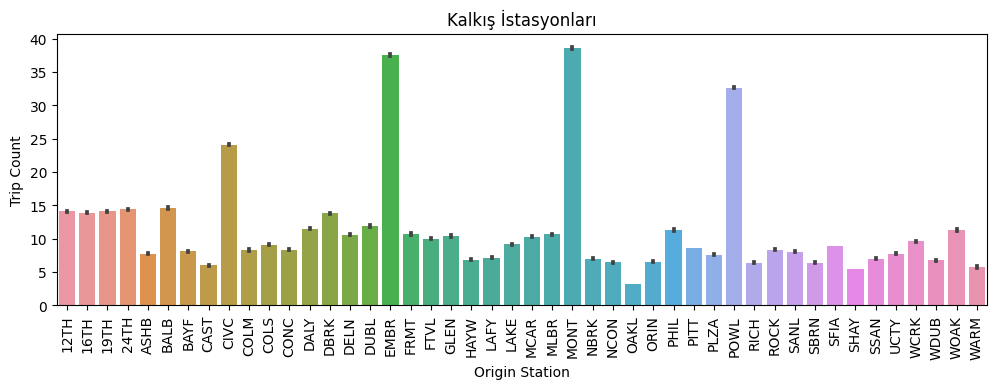

In [18]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(3,1,1)
ax=sns.barplot(x=df["Origin Station"],y=df["Trip Count"])
plt.xticks(rotation=90)
plt.title('Kalkış İstasyonları');

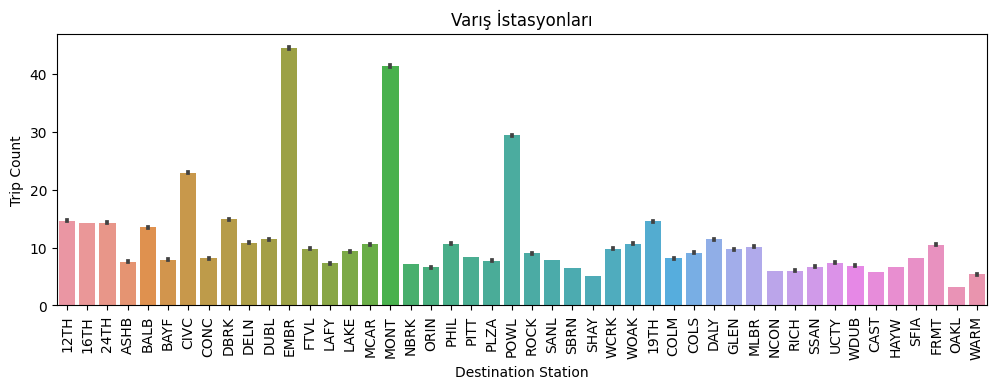

In [19]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(3,1,1)
ax=sns.barplot(x=df["Destination Station"],y=df["Trip Count"])
plt.xticks(rotation=90)
plt.title('Varış İstasyonları');

### En az popüler BART güzergahı hangisidir?

In [20]:
least_popular=df.groupby('Origin Station')['Trip Count'].sum().idxmin()
print('En az popüler BART istasyonu, kalkış istasyonuna göre:',least_popular)

En az popüler BART istasyonu, kalkış istasyonuna göre: WARM


In [21]:
least_popular1=df.groupby('Destination Station')['Trip Count'].sum().idxmin()
print('En az popüler BART istasyonu, varış istasyonuna göre:',least_popular1)

En az popüler BART istasyonu, varış istasyonuna göre: WARM


In [22]:
least_popular2=df.groupby(['Origin Station', 'Destination Station'])['Trip Count'].sum().idxmin()
print('En az popüler BART güzergahı:',least_popular2)

En az popüler BART güzergahı: ('WARM', 'MLBR')


### Bir koltuk bulmak istiyorsanız Berkeley'den SF'ye gitmek için en iyi zaman ne zamandır?

In [23]:
#DBRK - DownTown Berkeley - - EMBR - San Francisco'nun merkezinde bir yer

In [24]:
# Berkeley'den SF'ye giden güzergahları seç
route=df[(df['Origin Station'] == 'DBRK') & (df['Destination Station'] == 'EMBR')]

# En az yoğun saatleri bul
route['Hour'] = pd.to_numeric(route['Hour'])
time = route.groupby('Hour')['Trip Count'].sum().sort_values(ascending=True).head(2).index.tolist()

# En az yoğun günleri bul
g={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
route['day_name'] = route['day'].map(g)
days = route.groupby('day_name')['Trip Count'].sum().sort_values(ascending=True).head(2).index.tolist()

print("Berkeley'den SF'ye en az yoğun saatler:", time)
print("Berkeley'den SF'ye en az yoğun günler:", days)

Berkeley'den SF'ye en az yoğun saatler: [3, 2]
Berkeley'den SF'ye en az yoğun günler: ['Friday', 'Wednesday']


### Haftanın hangi günü en yoğundur?

In [25]:
days=df.groupby('day_name')['Trip Count'].sum()

most_busy_days=days.idxmax()
print('Haftanın en yoğun günü:', most_busy_days)

Haftanın en yoğun günü: Wednesday


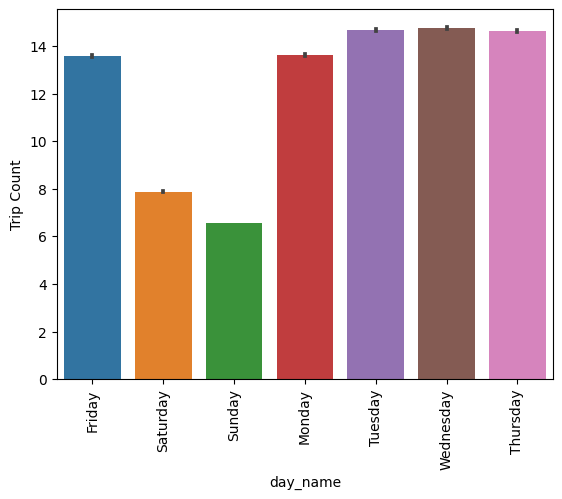

In [52]:
sns.barplot(x=df["day_name"],y=df["Trip Count"])
plt.xticks(rotation=90);

### Gece geç saatlerde BART'a kaç kişi biniyor?

In [27]:
night_time = (df['Hour'].astype(int) >= 0) & (df['Hour'].astype(int) < 6) #Gece saat 12 ile 5 arası
night_trips = df.loc[night_time, 'Trip Count'].sum()

print("Gece geç saatlerde BART'a binen yolcu sayısı:", night_trips)

Gece geç saatlerde BART'a binen yolcu sayısı: 5803819


## <font color="blue"> Veri Bilimi Soruları </font>

### Her istasyon arasındaki düz çizgi mesafesini hesaplayın

Her istasyon arasındaki düz çizgi mesafesini hesaplamak için bize ilk önce lokasyon bilgisi (enlem,boylam) yani latitude ve longitude bilgisi gerekiyor.Bu istasyonların lokasyonlarını bulduktan sonra bir dataframe'e çevireceğiz ve ikisini birleştirip, her istasyon arasındaki düz çizgi mesafesini hesaplayacağız.

In [28]:
df.head()

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,day_name
0,0,12TH,12TH,1,1,1,2016,Friday
1,0,12TH,16TH,1,1,1,2016,Friday
2,0,12TH,24TH,4,1,1,2016,Friday
3,0,12TH,ASHB,4,1,1,2016,Friday
4,0,12TH,BALB,2,1,1,2016,Friday


In [29]:
df['Origin Station'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WARM'], dtype=object)

In [30]:
# İstasyonların koordinatlarını tanımlayıyoruz
origin_locations = {
    'Origin Station': ['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST','CIVC', 'COLM', 'COLS', 'CONC', 'DALY',
    'DBRK', 'DELN', 'DUBL','EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR','MLBR', 'MONT', 'NBRK', 'NCON', 
    'OAKL', 'ORIN', 'PHIL', 'PITT','PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY','SSAN', 'UCTY', 'WCRK', 
    'WDUB', 'WOAK', 'WARM'],
    
    'Latitude1': [37.7988, 37.7720, 37.7753, 37.7753, 37.7461, 37.7540, 37.6386, 37.7670,37.7955, 37.6330, 37.7871, 38.0049,
    37.6656, 37.8705, 37.7082, 37.7021,37.7955, 37.5630, 37.7067, 37.9409, 37.6690, 38.0035, 37.7856, 37.7955,37.4899, 
    37.7946, 37.5667, 38.0502, 37.8044, 37.6359, 37.7857, 38.0220, 37.8833, 37.7749, 37.9250, 37.6000, 37.6610, 37.6348,
    37.6213, 37.7270,37.6464, 37.6824, 38.0074, 37.6783, 37.8043, 37.9733],
    
    'Longitude1': [-122.2751, -122.4183, -122.4441, -122.4271, -122.2119, -122.2172, -122.0427, -121.9780,-122.4018, -122.4863,
    -122.4168, -122.0574, -122.4460, -122.2585, -122.4440, -121.8922,-122.3964, -122.0211, -122.4470, -122.0215, -122.0961,
    -122.1206, -122.2468, -122.4018,-122.2312, -122.3997, -122.2844, -122.0134, -122.2711, -122.1065, -122.3943, -121.8851,
     -122.2824, -122.4194, -122.3478, -122.0310, -122.1833, -122.4270, -122.3790, -122.1471, -122.2094, -122.0723, -122.0600,
    -121.9678, -122.2711, -122.0581]
}

# DataFrame oluşturuyoruz
origin_locations = pd.DataFrame(origin_locations)

In [31]:
df['Destination Station'].unique()

array(['12TH', '16TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CIVC', 'CONC',
       'DBRK', 'DELN', 'DUBL', 'EMBR', 'FTVL', 'LAFY', 'LAKE', 'MCAR',
       'MONT', 'NBRK', 'ORIN', 'PHIL', 'PITT', 'PLZA', 'POWL', 'ROCK',
       'SANL', 'SBRN', 'SHAY', 'WCRK', 'WOAK', '19TH', 'COLM', 'COLS',
       'DALY', 'GLEN', 'MLBR', 'NCON', 'RICH', 'SSAN', 'UCTY', 'WDUB',
       'CAST', 'HAYW', 'SFIA', 'FRMT', 'OAKL', 'WARM'], dtype=object)

In [32]:
# İstasyonların koordinatlarını tanımlayoruz
destination_locations = {
    'Destination Station': ['12TH', '16TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CIVC', 'CONC','DBRK', 'DELN', 'DUBL', 'EMBR',
    'FTVL', 'LAFY', 'LAKE', 'MCAR','MONT', 'NBRK', 'ORIN', 'PHIL', 'PITT', 'PLZA', 'POWL', 'ROCK','SANL', 'SBRN', 'SHAY',
    'WCRK', 'WOAK', '19TH', 'COLM', 'COLS','DALY', 'GLEN', 'MLBR', 'NCON', 'RICH', 'SSAN', 'UCTY', 'WDUB','CAST', 'HAYW',
    'SFIA', 'FRMT', 'OAKL', 'WARM'],
    
    'Latitude2': [37.7988, 37.7720, 37.7753, 37.7461, 37.7540, 37.6386, 37.7955, 38.0049,37.8705, 37.7082, 37.7021,
    37.7955, 37.7067, 38.0035, 37.7856, 37.7955,37.7946, 37.5667, 37.6359, 37.7857, 38.0220, 37.8833, 37.7749, 
    37.6000,37.6610, 37.6348, 37.7270, 38.0074, 37.8043, 37.7753, 37.6330, 37.7871, 37.6656, 37.9409, 37.4899, 
    38.0502, 37.9250, 37.6464, 37.6824, 37.6783,37.7670, 37.6690, 37.6213, 37.5630, 37.8044, 37.9733],
    
    'Longitude2': [-122.2751, -122.4183, -122.4271, -122.2119, -122.2172, -122.0427, -122.4018, -122.0574,-122.2585, 
    -122.4440, -121.8922, -122.3964, -122.4470, -122.1206, -122.2468, -122.4018,-122.3997, -122.2844, -122.1065,
    -122.3943, -121.8851, -122.2824, -122.4194, -122.0310, -122.1833, -122.4270, -122.1471, -122.0600, -122.2711,
    -122.4441, -122.4863, -122.4168,-122.4460, -122.0215, -122.2312, -122.0134, -122.3478, -122.2094, -122.0723,
    -121.9678,-121.9780, -122.0961, -122.3790, -122.0211, -122.2711, -122.0581]
}

# DataFrame oluşturuyoruz
destination_locations = pd.DataFrame(destination_locations)

In [33]:
df1=pd.concat([origin_locations,destination_locations],axis=1)
#Her iki istasyona ait lokasyon bilgilerini birleştiriyoruz.

In [34]:
df1.head()

,Origin Station,Latitude1,Longitude1,Destination Station,Latitude2,Longitude2
0,12TH,37.7988,-122.2751,12TH,37.7988,-122.2751
1,16TH,37.7720,-122.4183,16TH,37.7720,-122.4183
2,19TH,37.7753,-122.4441,24TH,37.7753,-122.4271
3,24TH,37.7753,-122.4271,ASHB,37.7461,-122.2119
4,ASHB,37.7461,-122.2119,BALB,37.7540,-122.2172


In [35]:
#pip install geopy

In [36]:
from geopy.distance import geodesic

# Mesafeyi hesapla ve yeni bir sütuna ekle
df1['Distance (km)'] = df1.apply(lambda row: geodesic(
    (row['Latitude1'], row['Longitude1']),
    (row['Latitude2'], row['Longitude2'])).kilometers, axis=1)

In [37]:
df1.sort_values(by='Distance (km)', ascending=False).head(5)

,Origin Station,Latitude1,Longitude1,Destination Station,Latitude2,Longitude2,Distance (km)
31,PITT,38.0220,-121.8851,COLS,37.7871,-122.4168,53.538380
42,WCRK,38.0074,-122.0600,SFIA,37.6213,-122.3790,51.239471
35,ROCK,37.6000,-122.0310,NCON,38.0502,-122.0134,49.993144
34,RICH,37.9250,-122.3478,MLBR,37.4899,-122.2312,49.374560
10,COLS,37.7871,-122.4168,DUBL,37.7021,-121.8922,47.188875


### Herhangi 2 istasyon arasında BART ile işe gidip gelen kişi sayısını tahmin edebilen bir model oluşturun

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [39]:
#df3=pd.concat([df,df1],axis=1)
#Bu şekilde birleştirdiğimizde aynı sütunları tekrar alıyor.

In [40]:
df3=pd.merge(df, df1, on=['Origin Station', 'Destination Station'], how='inner')
#Bu yüzden merge ile birleştirme yapıyoruz.

In [64]:
df3.sample(5)

,Hour,Origin Station,Destination Station,Trip Count,day,month,year,day_name,Latitude1,Longitude1,Latitude2,Longitude2,Distance (km)
278823,14,PHIL,COLM,3,17,7,2016,Sunday,37.7857,-122.3943,37.6330,-122.4863,18.789789
368123,21,GLEN,PHIL,3,22,12,2016,Thursday,37.9409,-122.0215,37.7857,-122.3943,37.052452
282574,12,PHIL,COLM,1,28,12,2017,Thursday,37.7857,-122.3943,37.6330,-122.4863,18.789789
203115,23,SFIA,UCTY,2,28,12,2016,Wednesday,37.6213,-122.3790,37.6824,-122.0723,27.901714
305190,13,NCON,WCRK,4,10,6,2017,Saturday,38.0502,-122.0134,38.0074,-122.0600,6.269639


In [65]:
x=df3.drop(['Trip Count'], axis=1)
y=df3[['Trip Count']]

In [66]:
x=pd.get_dummies(x, drop_first=True)

In [67]:
x.head()

,Hour,day,month,year,Latitude1,Longitude1,Latitude2,Longitude2,Distance (km),Origin Station_16TH,...,Destination Station_WARM,Destination Station_WCRK,Destination Station_WDUB,Destination Station_WOAK,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,1,1,2016,37.7988,-122.2751,37.7988,-122.2751,0.0,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,1,2016,37.7988,-122.2751,37.7988,-122.2751,0.0,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1,1,2016,37.7988,-122.2751,37.7988,-122.2751,0.0,False,...,False,False,False,False,False,False,False,False,False,False
3,11,1,1,2016,37.7988,-122.2751,37.7988,-122.2751,0.0,False,...,False,False,False,False,False,False,False,False,False,False
4,12,1,1,2016,37.7988,-122.2751,37.7988,-122.2751,0.0,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.2, random_state=42)

In [69]:
xgb=XGBRegressor()
model=xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 12.04557444112874
R2 Score: 0.8190485994079938


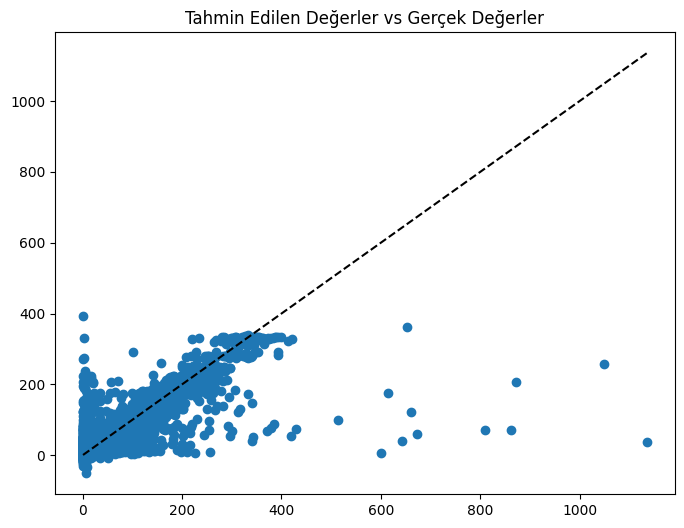

In [47]:
y_pred=model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Tahmin Edilen Değerler vs Gerçek Değerler');
#XGB Regressor

In [49]:
dt=DecisionTreeRegressor()
model2=dt.fit(x_train,y_train)
pred2=dt.predict(x_test)
rmse=mean_squared_error(y_test, pred2)**.5
r2=r2_score(y_test, pred2)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 15.369467202309876
R2 Score: 0.7054055625433394


In [50]:
GBR=GradientBoostingRegressor()
model3=GBR.fit(x_train,y_train)
pred3=GBR.predict(x_test)
rmse=mean_squared_error(y_test, pred3)**.5
r2=r2_score(y_test, pred3)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 16.591339490897543
R2 Score: 0.6567031511436885


In [48]:
ETR=ExtraTreeRegressor()
model1=ETR.fit(x_train,y_train)
pred1=ETR.predict(x_test)
rmse=mean_squared_error(y_test, pred1)**.5
r2=r2_score(y_test, pred1)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 17.04043818489597
R2 Score: 0.6378667238876357


* **Herhangi 2 istasyon arasında BART ile işe gidip gelen kişi sayısını tahmin edebilen bir model oluşturun:Buna nasıl yaklaşırdınız?**
Modeli geliştirdim.Başarı oranı yaklaşık olarak yüzde 80 civarında.Böyle bir modelin her yerde olması gerektiğini düşünüyorum.Böylece işe gidip gelenlerin sayısına göre daha fazla veya daha az metro kullanıma sunulabilir.

* **Hangi ek verilere ihtiyacınız olurdu?**
Enlem ve boylam bilgisi ek veri olabilir.

* **Şehir veya Bart yetkililerinin verilerinizi nasıl kullanmasını istersiniz?**
Hangi gün ve saat en yoğunsa o saatlerde daha fazla metro çalışabilir.Hava durumuyla birlikte(mesela her yer buz tutmuşsa ve o kimsenin arabası çalışmazsa)metro kullanmak isteyebilir.Metro kullananların sayısı artabilir.O zamanlarda da yoğunluk olacağı için yine daha fazla metro çalıştırılabilir.

### Özet

Bu projede 2016-2017 verilerinin BART yani kısaca metro verilerini analiz ettik.Projede istenen sorulara cevap verdik.Herhangi iki istasyon arasında işe gidip gelen kişilerin sayısını tahmin eden bir model oluşturduk.Decision Tree,Extra Tree ve Gradient Boosting modellerinin başarı oranları yüzde 65-70 civarında.En iyi model yüzde 81 başarı oranı ile XGB Regressor oldu.Model için daha fazla ince ayar yapılabilir.Sorulara cevap verdikten sonra projemi bitirmiş oldum..